# Import libraries

In [20]:
# import libraries
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.io as pio

# Load data

In [21]:
# load data
df = pd.read_csv('apple_products.csv')
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


##  data info

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


## Check Missing values and Duplicates

In [23]:
# lets check the missing values in the dataset
print(df.isnull().sum() / len(df) * 100)
# lets also check the duplicates in the dataset
print(f'\nDuplicates: {df.duplicated().sum()}')

Product Name           0.0
Product URL            0.0
Brand                  0.0
Sale Price             0.0
Mrp                    0.0
Discount Percentage    0.0
Number Of Ratings      0.0
Number Of Reviews      0.0
Upc                    0.0
Star Rating            0.0
Ram                    0.0
dtype: float64

Duplicates: 0


- The dataset doesnot have any missing values

In [24]:
# lets check the descriptive statistics of the dataset
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


# Let's do analysis 


In [25]:
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


### 1.Top 10 highest rated iphones

In [26]:
# top 10 highest rated iphones
highest_rated = df.sort_values(by='Star Rating', ascending=False).head(10)
print(highest_rated['Product Name'])

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object


### How many ratings do the highest-rated iphones have?

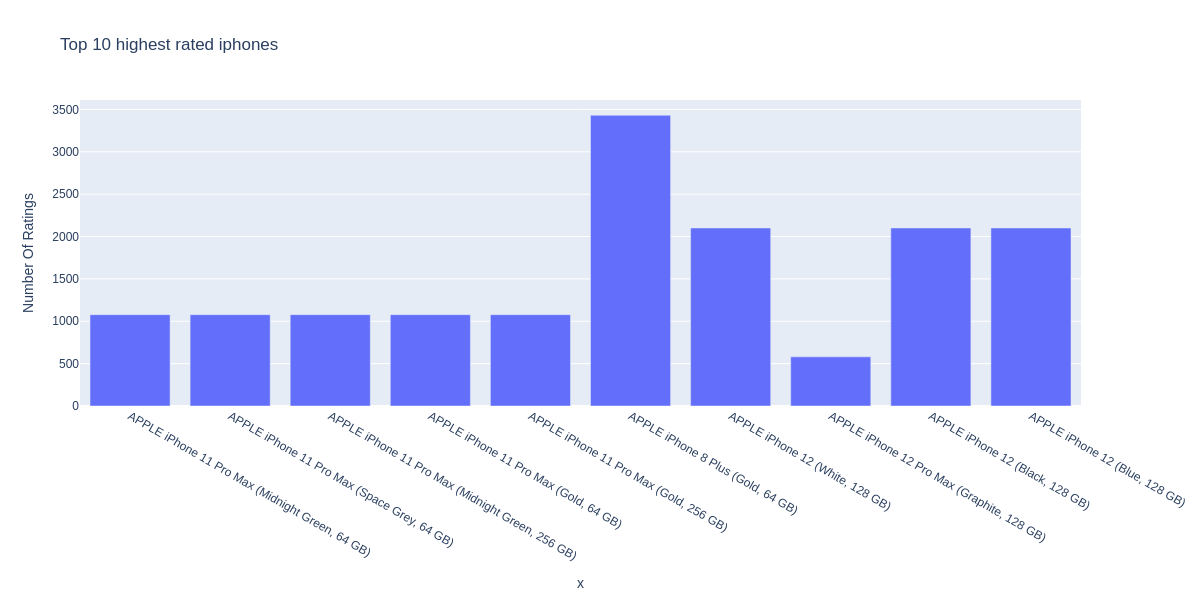

In [27]:
# 2.How many ratings do the highest rated iphones have?
iphones = highest_rated['Product Name'].value_counts()

# plot a bar chart of the top 10 highest rated iphones
fig = px.bar(highest_rated , title='Top 10 highest rated iphones' , x=iphones.index, y=highest_rated['Number Of Ratings'])
fig.update_layout(width=1200, height=600)
fig.show()

# Save the plot as an img in notebook
from IPython.display import Image , display
display(Image(filename='highest_rated_iphones.png'))

- Apple iPhone 8 Plus (Gold, 64 GB) has the highest number of ratings with 3431. 

###  Which iphone has the highest number of reviews?

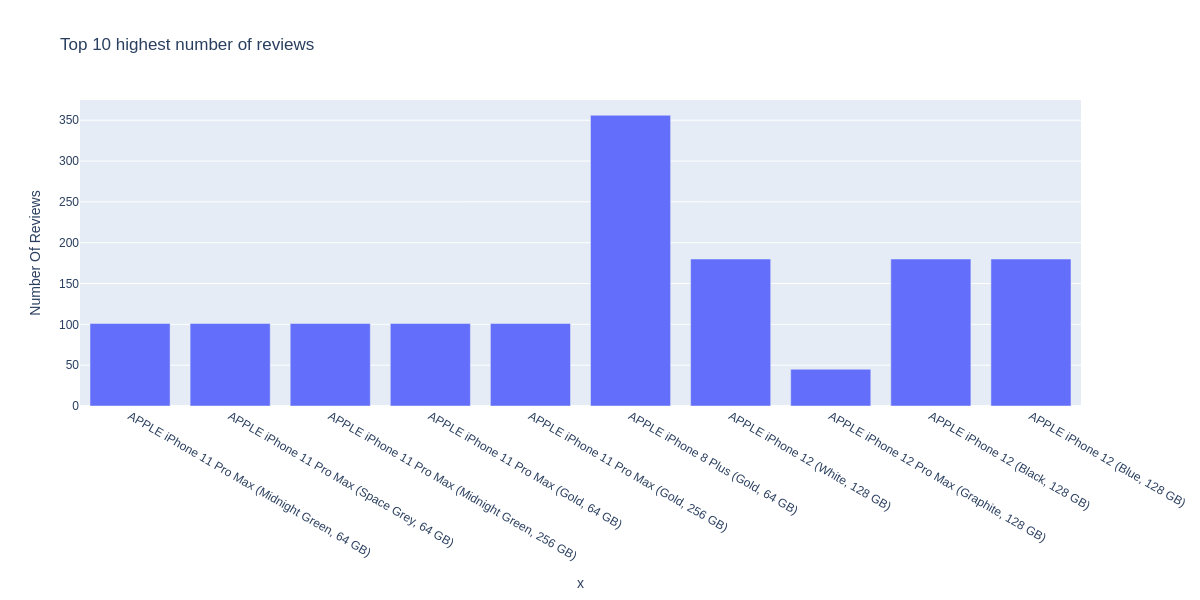

In [28]:
# 3.Which iphones has the highest number of reviews?
iphones = highest_rated['Product Name'].value_counts()

# plot a bar chart of the top 10 highest rated iphones
fig = px.bar(highest_rated , title='Top 10 highest number of reviews' , x=iphones.index, y=highest_rated['Number Of Reviews'])
fig.update_layout(width=1200, height=600)
fig.show()

# Save the plot as an img in notebook
from IPython.display import Image , display
display(Image(filename='highest_number_of_reviews.png'))

- Apple iPhone 8 Plus (Gold, 64 GB) has the highest number of reviews with 356.

### What is the relationship between the sale price and the number of ratings?

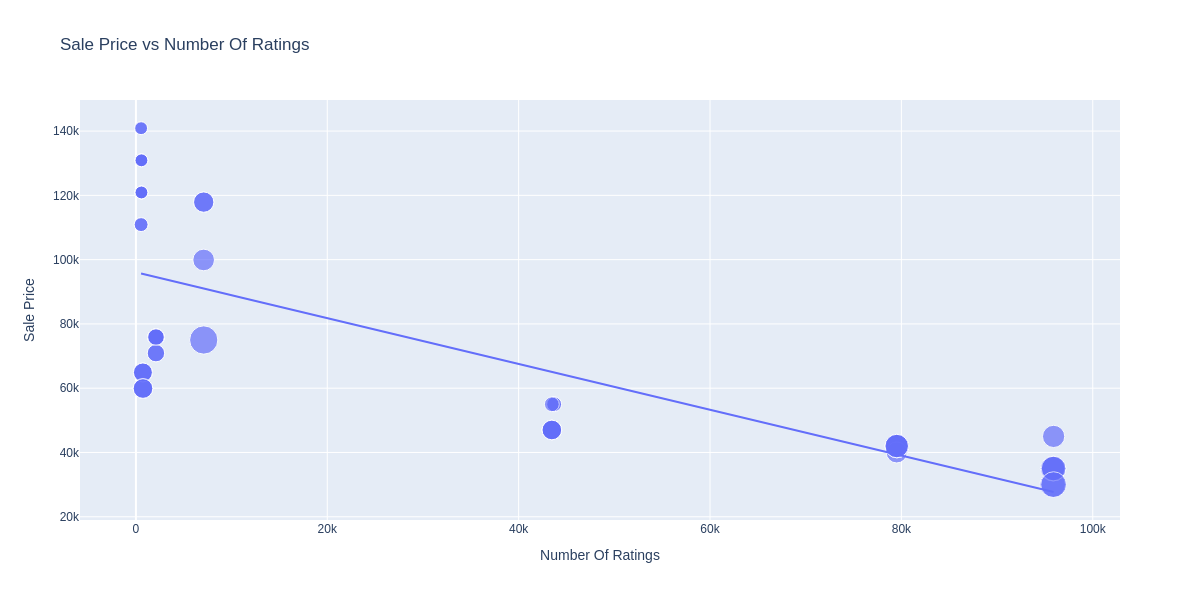

In [29]:
# 4.What is the relationship between the sale price and the number of ratings?
# plot a scatter plot of the sale price and the number of ratings
fig = px.scatter(df, y='Sale Price', x='Number Of Ratings', size='Discount Percentage' , trendline='ols', title='Sale Price vs Number Of Ratings')
fig.update_layout(width=1200, height=600)
fig.show()

# Save the plot as an img in notebook
from IPython.display import Image , display
display(Image(filename='sale_price_vs_number_of_ratings.png'))

- There is a negative linear relatioship between the sale price of iphones and the number of ratings.It means iphones with lower price sold more.

### What is the relationship between the discount percentage and the number of ratings?

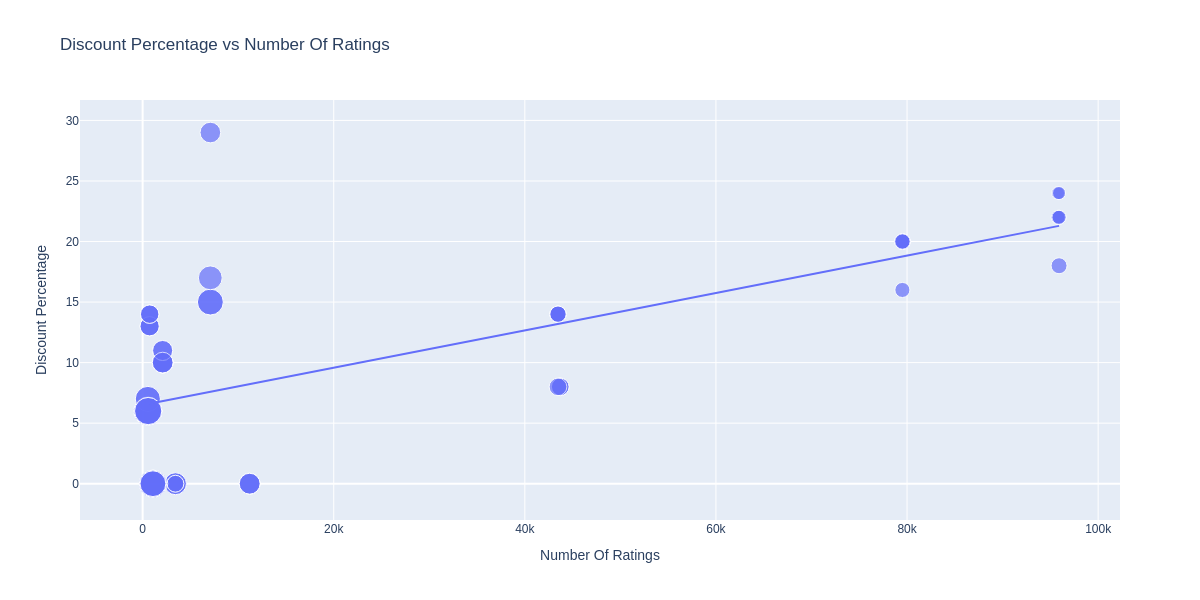

In [30]:
# 5.What is the relationship between the discount percentage and the number of ratings?
# plot a scatter plot of the discount percentage and the number of ratings
fig = px.scatter(df, y='Discount Percentage', x='Number Of Ratings', size='Sale Price' , trendline='ols', title='Discount Percentage vs Number Of Ratings')
fig.update_layout(width=1200, height=600)
fig.show()

# Save the plot as an img in notebook
from IPython.display import Image , display
display(Image(filename='discount_percentage_vs_number_of_ratings.png'))

- There is a positive linear relatioship between the discount percentage of iphones and the number of ratings.It means iphones with higher discount percentage sold more.

### Most expensive and least expensive iphones

In [31]:
# 6.Most expensive and least expensive iphones
most_expensive = df.loc[df['Sale Price'].idxmax()]
least_expensive = df.loc[df['Sale Price'].idxmin()]
print(f'Most Expensive: \n{most_expensive}\n')
print(f'\nLeast Expensive: \n{least_expensive}')

Most Expensive: 
Product Name                        APPLE iPhone 12 Pro (Silver, 512 GB)
Product URL            https://www.flipkart.com/apple-iphone-12-pro-s...
Brand                                                              Apple
Sale Price                                                        140900
Mrp                                                               149900
Discount Percentage                                                    6
Number Of Ratings                                                    542
Number Of Reviews                                                     42
Upc                                                     MOBFWBYZ5UY6ZBVA
Star Rating                                                          4.5
Ram                                                                 4 GB
Name: 24, dtype: object


Least Expensive: 
Product Name                              APPLE iPhone SE (White, 64 GB)
Product URL            https://www.flipkart.com/apple-iphone-se